## Sustitución por la Media/Mediana con Scikit-learn ==> SimpleImputer

En la libreria de Scikit-learn hay una clase para manejar una gran variedad de métodos de sustitución.

El **SimpleImputer** es una clase que provee una funcionalidad básica para la sustitutición de valores ausentes, incluyendo:

- Sustitución por la media y la mediana para variables numéricas
- Sustutución por la categoría más frecuente para variables categóricas.
- Sustitución por valores arbitrarios para variables numéricas y categóricas.

### Ventajas

- Facil de usar si se aplica a todo el dataframe
- Código mantenido por desarolladores de Scikit-learn: buena calidad
- Rápida computación (usa numpy para los cálculos)
- Permite usar grid search (búsqueda en cuadrículas) para varios métodos de sustitución
- Permite usar diferentes valores para codificar ausencia de datos (se puede indicar si por ejemplo los valores nulos son np.nan or zeros, etc)

### Limitaciones

- Retorna  a numpy array instead of a pandas dataframe, inconveniente para el análisis de datos
- Necesita usar clases adicionales para seleccionar cuales variables (features en inglés) se deben sustituir ==>
    - requiere lineas de código adicional
    - requiere ser usado con otras clases que todavia estan en beta (puede cambiar sin aviso)
    - no es tan sencillo de usar
    
### Más detalles acerca de los transformadores (transformers en inglés)

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## En este demo:

Vamos a aprender **sustitución media/mediana con Scikit-learn** usando los datos Ames House Price.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahi el nombre dado a la clase.
* 'slicing' significa seleccionar conjuntos de datos (columnas/filas) de un ‘DataFrame’.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# estas son las clases para sustitutición con sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dividir dataset
from sklearn.model_selection import train_test_split

In [4]:
# solo usaremos las siguientes variables en el demo:
# 3 tienen NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [5]:
# carguemos datos con unas columnas

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [6]:
# evaluemos el porcentaje de valores nulos por cada una de las variables
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

Las variables LotFrontage, MasVnrArea y GarageYrBlt tienen datos ausentes.

In [7]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables (features)
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # solo las variables
                                                    data['SalePrice'], # el target
                                                    test_size=0.3, # el percentaje de obs en el segmento de prueba
                                                    random_state=0) # para reproducir
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [8]:
# evaluemos el porcentaje de datos ausentes nuevamente
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer en el conjunto de datos

In [9]:
# Ahora sustituyamos los valores faltantes con  SimpleImputer

# creemos una instancia de la clase SimpleImputer
# indicaremos que queremos sustituir con la mediana
imputer = SimpleImputer(strategy='median')

# ajustamos 'imputer' al segmento de entrenamiento
# el imputer (reemplazador) aprenderá cual es la mediana de todas las variables
imputer.fit(X_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

**Nota, si quieres hacer la sustitución por la media en lugar de la mediana, simplemente pasa el argumento 'mean' en 'strategy'**

In [10]:
# podemos ver cual fue la mediana calculada asi:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [11]:
# y ahora podemos investigar la mediana directamente para corroborar
# que el imputer hizo un buen trabajo
X_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

**Note** el SimpleImputer aprende (calcula) la mediana de TODAS las variables en los datos, tanto las que tienen o las que no valores nulos o NA.

In [12]:
# y ahora sustituimos en segmentos de entrenamiento y prueba

# NOTA: los datos se devuelven como un numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [13]:
# si queremos continuar con nuestro análisis de datos, 
# tenemos que codificar los datos nuevamente en un dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


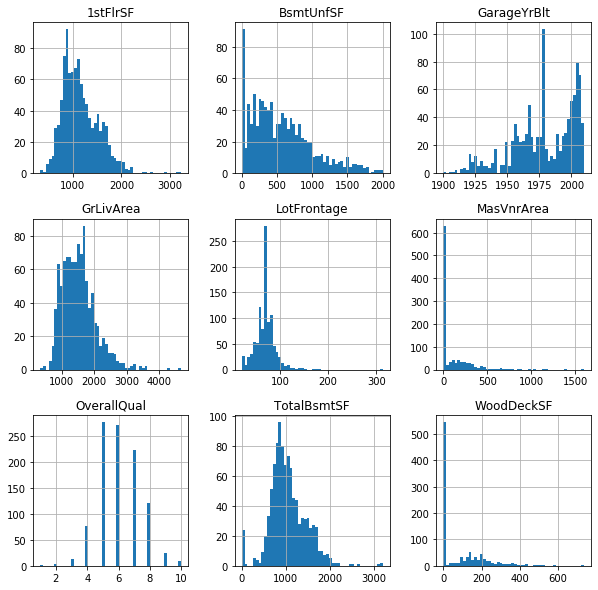

In [14]:
# Exploremos el cambio en las distribuciones despues de la sustitución por la mediana
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.hist(bins=50, figsize=(10,10))
plt.show()

La variable LotFrontAge tiene una barra alta en el valor de la media en el histograma, que aparece luego de la imputación.

**ADVERTENCIA**: cuando se codifica el numpy array que retorna Scikit-learn de vuelta a un dataframe, existe el riesgo que el orden de las variables se altere y por lo tanto se DISTORCIONEN los datos!!

Necesitas ser extremadamente cuidadoso para pasar las colunmas al comando pd.DataFrame en el mismo orden que estaban en X_train ANTES de la transformación!.


### SimpleImputer: diferentes métodos en diferentes variables

En algunas ocasiones, queremos implementar diferentes técnicas de imputación para las diferentes variables. 
Cómo podemos hacer esto usando el SimpleImputer de Scikit-learn?

Tenemos que utilizar otra clase llamada ColumnTransformer. 

**Nota** ColumnTransformer se encuentra en versión beta (a la fecha - 09/2019). Esto quiere decir que los desarrolladores pueden cambiar su forma de uso o incluso remover la clase. La implicación es que el código que escribas hoy, puede que no se pueda usar más adelante con las nuevas versiones de Scikit-learn. Usualmente esto es lo que sucede con paquetes open-source que ensayan nueva funcionalidad.

Más detalles sobre el ColumnTransformer en [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [13]:
# Separemos en segmentos para entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],# predictors only
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [15]:
# % de valores ausentes
X_train.isnull().mean()

OverallQual    0.0
TotalBsmtSF    0.0
1stFlrSF       0.0
GrLivArea      0.0
WoodDeckSF     0.0
BsmtUnfSF      0.0
LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

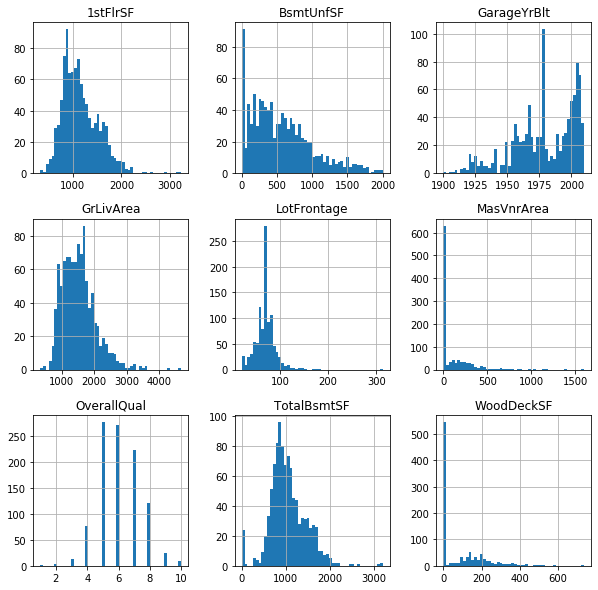

In [16]:
# Exploremos el cambio en las distribuciones para decidir si es mejor usar
# sustitutición por media o mediana

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Para este demo, vamos a sustituir LotFrontage con la media, y MasVnrArea, GarageYrBlt con la mediana ya que estas variables están un poco sesgadas.

In [17]:
# primero vamos a crear una lista, indicando cuales son las 
# variables a sustituir con cada método

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

# luego vamos a instanciar imputers dentro de un pipeline
# creamos un imputer para la media y otro para la mediana
# simplemente intercambiando los parametros en 'strategy'

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

# luego ponemos las variables en una lista y los transformadores juntos
# usando la columna transformer

# necesitamos añadir remainder = True para indicar que queremos
# TODAS las columnas devueltas al final de la transformación
# y no solo las que hemos transformado, que es el comportamiento por
# defecto del ColumnTransformer. 

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')


# parámetros del ColumnTransformer
# remainder = 'passthrough' indica que queremos retener TODAS las columnas del dataframe
            # de lo contrario solo las especificadas en los pasos de la sustitución se mantendran
    
# para mas detalles seguir la página de sklearn:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [18]:
# ahora ajustemos el preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('mean_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(memory=None,
              

In [20]:
# exploremos los transformers como este:
preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt'])]

In [21]:
# podemos ver los parámetros aprendidos asi:

# para el imputer de la media
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.54500978])

In [22]:
# y podemos corroborar el valor con el obtenido en el segmento de entrenamiento
X_train[numeric_features_mean].mean()

LotFrontage    69.54501
dtype: float64

In [23]:
# para el imputer de la mediana  hay dos valores aprendidos
# porque queremos sustituir 2 variables diferentes

preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [24]:
# y si corroboramos estos valores en el segmento de entrenamiento
X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [25]:
# y ahora podemos sustituir los datos
X_train = preprocessor.transform(X_train)

# y revisar que funcionó
np.mean(np.isnan(X_train))

0.0

In [24]:
# and now we can impute the test data
X_test = preprocessor.transform(X_test)

# and check it worked
np.mean(np.isnan(X_test))

0.0

In [26]:
# recuerda que el objeto retornado es un NumPy array
X_train

array([[  69.,  573., 1998., ..., 2034.,  576.,  318.],
       [  69.,    0., 1996., ..., 1291.,  307.,  288.],
       [  50.,    0., 1979., ...,  858.,  117.,  162.],
       ...,
       [  68.,    0., 1978., ..., 1902.,    0.,    0.],
       [  69.,   18., 2003., ..., 1557.,  143., 1374.],
       [  58.,   30., 1998., ..., 1839.,    0., 1195.]])

In [28]:
# si queremos poner el array de vuelta en un dataframe, necesitamos
# ser cuidadosos con el orden de las columnas

# podemos explorar las variables usadas en cada transformador
# incluyendo aquellas que quedaron ('remainder' en inglés) (estas son las que no fueron transformadas)
preprocessor.transformers_

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

'remainder', 'passthrough', [0, 1, 2, 3, 4, 5]

el código anterior nos dice cuales son las columnas que quedaron ( remainder) - especificamente su posición 0, 1, 2, 3, 4, 5 en X_train

In [29]:
# capturemos las columnas en una lista

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [30]:
# capturemos los datos de vuelta en un dataframe
pd.DataFrame(X_train,
             columns = numeric_features_mean+numeric_features_median+remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.0,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.0,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.0,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.0,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.0,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


**OTRA ADVERTENCIA**

ColumnTransformer simplemente selecciona (operación conocida como 'slicing' en inglés) las columnas requeridas para la sustitución y luego el SimpleImputer opera en aquella selección del dataframe. Si diferentes columnas (o features) son requeridas con diferentes métodos de sustitución, ColumnTransformer selecciona del dataframe las columnas requeridas por cada sustitución y luego las concatena para producir el resultado final.

En nuestro ejemplo, sucede lo siguiente:

- ColumnTransformer primero crea una columna sola con el primer feature, LotFrontage
- ColumnTransformer crea un dataframe de dos 2 columnas con las variables MasVnrArea y GarageBlt
- ColumnTransformer crea un dataframe adicional con las variables restantes en el segmento de entrenamiento
- El SimpleImputers aprende los parámetros para cada uno de los dataframes seleccionados  
- ColunmnTransformer concatena de vuelta todos los dataframes en el resultado final
